In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score , roc_auc_score , roc_curve ,classification_report
from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

In [21]:
df=pd.read_csv("SBI_Data.csv")

In [22]:
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [5]:
pf=ProfileReport(df)

In [6]:
pf

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Analysis of Data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


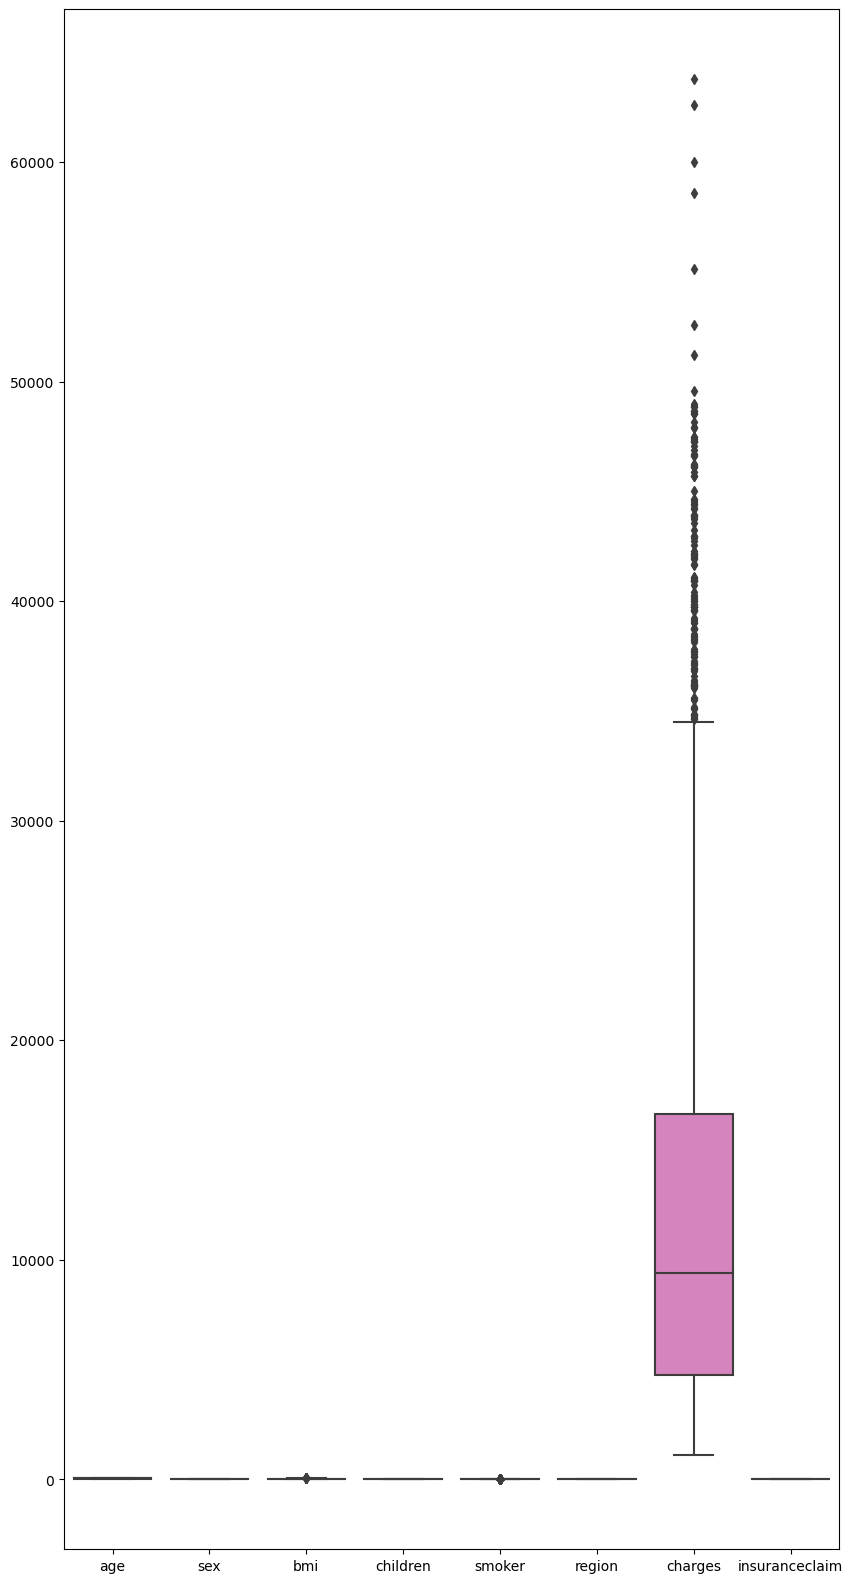

In [24]:
#Need to check the Outliers

fig , ax =plt.subplots(figsize=(10,20))
sns.boxplot(data=df, ax=ax)
plt.show()

In [25]:
#Now Outliers removal through quantile method

q=df["charges"].quantile(0.95)
df_new=df[df["charges"] < q]

In [26]:
df_new

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


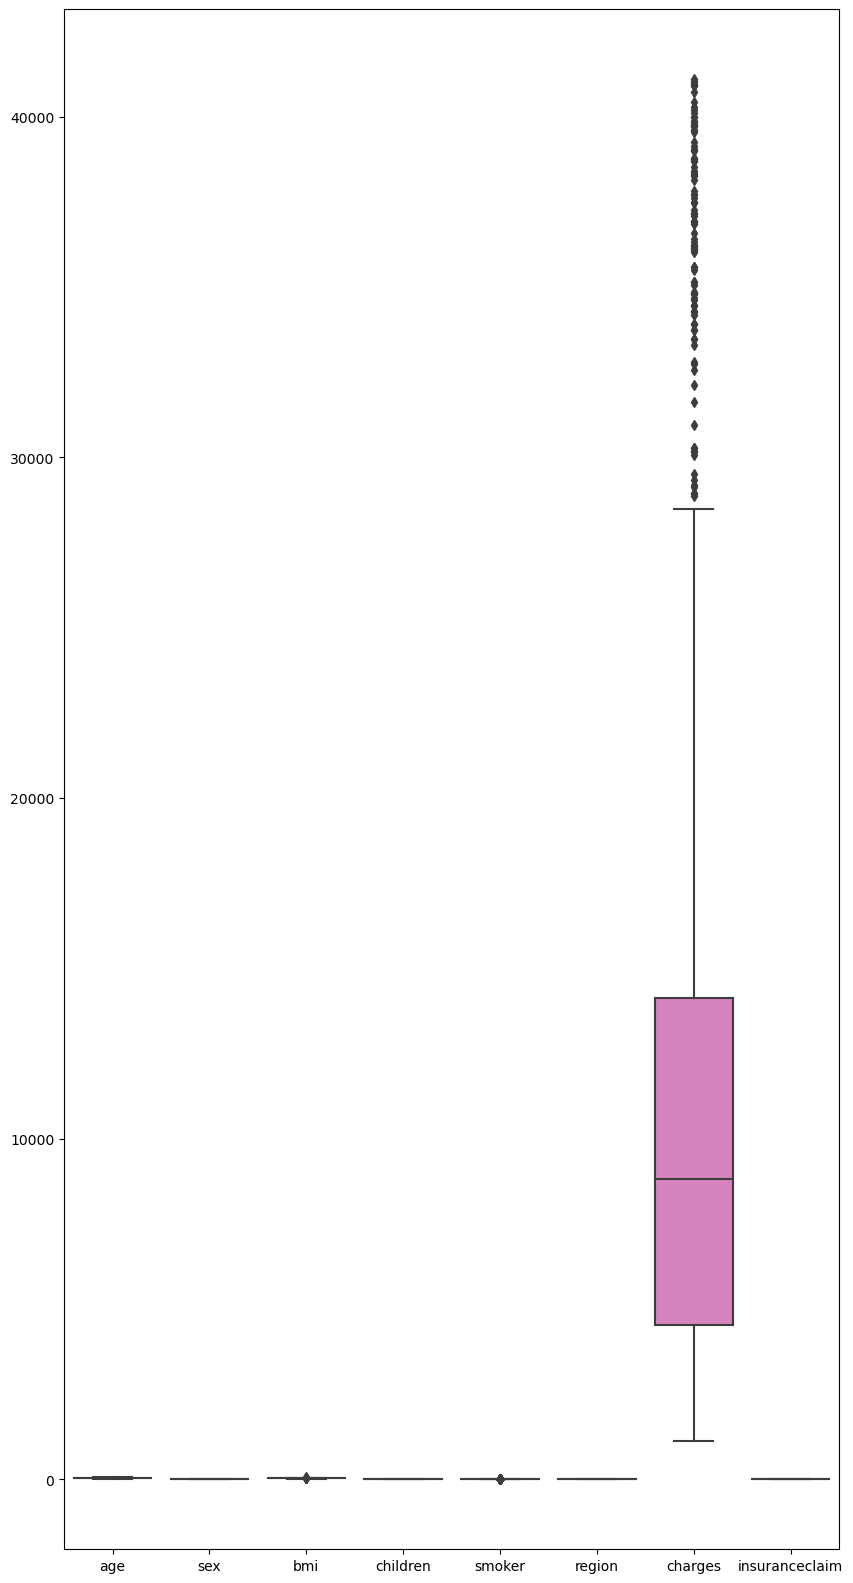

In [27]:
fig , ax =plt.subplots(figsize=(10,20))
sns.boxplot(data=df_new, ax=ax)
plt.show()

In [28]:
#Now will split the dataset

X=df.drop(columns="insuranceclaim")

In [29]:
X

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [30]:
y=df["insuranceclaim"]

In [31]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

In [32]:
df_new

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [33]:
#There is a variance in the value of the dataset , hence sacling is required

scalar=StandardScaler()
scalar.fit_transform(df_new)

array([[-1.40458963, -0.99921353, -0.4061449 , ...,  1.34249429,
         0.56130923,  0.88042016],
       [-1.47618225,  1.00078709,  0.57549918, ...,  0.44206672,
        -1.02305318,  0.88042016],
       [-0.76025611,  1.00078709,  0.44673156, ...,  0.44206672,
        -0.73836723, -1.13582133],
       ...,
       [-1.47618225, -0.99921353,  1.09056968, ...,  0.44206672,
        -1.03305711,  0.88042016],
       [-1.26140441, -0.99921353, -0.75732933, ...,  1.34249429,
        -0.99353927, -1.13582133],
       [ 1.60230016, -0.99921353, -0.21048501, ..., -0.45836085,
         1.84227504,  0.88042016]])

In [34]:
df_new_scalar=pd.DataFrame(scalar.fit_transform(df_new))

In [35]:
df_new_scalar

,0,1,2,3,4,5,6,7
0,-1.404590,-0.999214,-0.406145,-0.898035,2.267178,1.342494,0.561309,0.880420
1,-1.476182,1.000787,0.575499,-0.072129,-0.441077,0.442067,-1.023053,0.880420
2,-0.760256,1.000787,0.446732,1.579684,-0.441077,0.442067,-0.738367,-1.135821
3,-0.402293,1.000787,-1.274908,-0.898035,-0.441077,-0.458361,1.094282,-1.135821
4,-0.473886,1.000787,-0.242259,-0.898035,-0.441077,-0.458361,-0.799258,0.880420
...,...,...,...,...,...,...,...,...
1266,0.814781,1.000787,0.107253,1.579684,-0.441077,-0.458361,-0.095494,-1.135821
1267,-1.476182,-0.999214,0.266122,-0.898035,-0.441077,-1.358788,-0.972842,0.880420
1268,-1.476182,-0.999214,1.090570,-0.898035,-0.441077,0.442067,-1.033057,0.880420
1269,-1.261404,-0.999214,-0.757329,-0.898035,-0.441077,1.342494,-0.993539,-1.135821


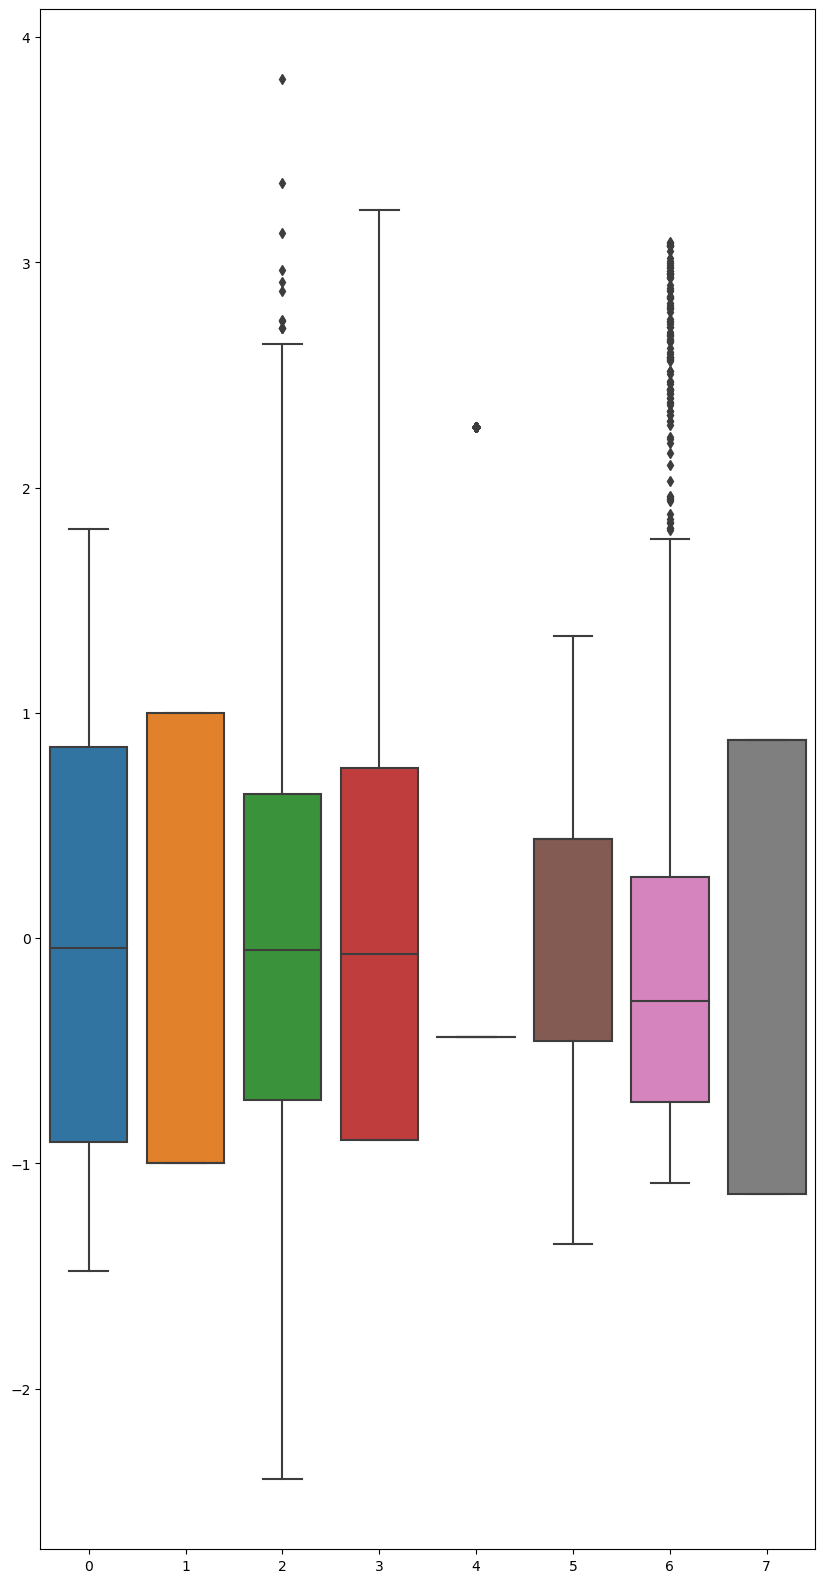

In [36]:
fig , ax =plt.subplots(figsize=(10,20))
sns.boxplot(data=df_new_scalar, ax=ax)
plt.show()

In [37]:
X_scaled=scalar.fit_transform(X)

In [38]:
X_scaled

array([[-1.43876426, -1.0105187 , -0.45332   , ...,  1.97058663,
         1.34390459,  0.2985838 ],
       [-1.50996545,  0.98959079,  0.5096211 , ..., -0.5074631 ,
         0.43849455, -0.95368917],
       [-0.79795355,  0.98959079,  0.38330685, ..., -0.5074631 ,
         0.43849455, -0.72867467],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , ..., -0.5074631 ,
         0.43849455, -0.96159623],
       [-1.29636188, -1.0105187 , -0.79781341, ..., -0.5074631 ,
         1.34390459, -0.93036151],
       [ 1.55168573, -1.0105187 , -0.26138796, ...,  1.97058663,
        -0.46691549,  1.31105347]])

In [39]:
y

0       1
1       1
2       0
3       0
4       1
       ..
1333    0
1334    1
1335    1
1336    0
1337    1
Name: insuranceclaim, Length: 1338, dtype: int64

In [40]:
#Need to check the Multicollinearity

vif_df=pd.DataFrame()

In [41]:
X_scaled.shape

(1338, 7)

In [42]:
X_scaled.shape[1]

7

In [44]:
vif_df["vif"]=[variance_inflation_factor(X_scaled,i)for i in range(X_scaled.shape[1])]

vif_df["features"]=X.columns

In [45]:
vif_df

,vif,features
0,1.372866,age
1,1.009006,sex
2,1.153126,bmi
3,1.011617,children
4,3.536099,smoker
5,1.030143,region
6,4.011830,charges


In [46]:
#None of the feature is having vif value greater than 10 , hence there is no Multicollinearity

In [47]:
x_train , x_test , y_train , y_test = train_test_split(X_scaled , y , test_size=.20 , random_state=145)

In [48]:
x_train

array([[-0.22834403, -1.0105187 , -1.39903643, ..., -0.5074631 ,
        -1.37232554, -0.49912966],
       [ 1.33808216, -1.0105187 , -0.57307247, ..., -0.5074631 ,
        -0.46691549, -0.086533  ],
       [-0.15714284,  0.98959079,  0.02240899, ..., -0.5074631 ,
         1.34390459, -0.71237652],
       ...,
       [-1.50996545, -1.0105187 , -0.08996148, ..., -0.5074631 ,
        -1.37232554, -0.91420959],
       [-0.22834403, -1.0105187 , -0.26630929, ..., -0.5074631 ,
         0.43849455, -0.49784116],
       [-0.94035593,  0.98959079, -1.61803581, ..., -0.5074631 ,
         1.34390459, -0.90604567]])

In [49]:
x_test

array([[ 1.48048454,  0.98959079,  1.03210277, ..., -0.5074631 ,
        -1.37232554, -0.04372025],
       [-0.79795355,  0.98959079, -0.23021951, ..., -0.5074631 ,
        -1.37232554, -0.72959975],
       [ 0.05646073, -1.0105187 , -0.53534224, ..., -0.5074631 ,
         1.34390459, -0.55954274],
       ...,
       [ 0.62607026, -1.0105187 , -1.28994685, ..., -0.5074631 ,
         1.34390459, -0.41314976],
       [ 1.40928335,  0.98959079, -0.13671415, ...,  1.97058663,
        -1.37232554,  1.39726037],
       [-1.22516069, -1.0105187 , -1.71072094, ..., -0.5074631 ,
        -0.46691549, -0.88741621]])

# LogisticRegression

In [51]:
logr=LogisticRegression(verbose=1)

In [52]:
logr.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


LogisticRegression(verbose=1)

In [54]:
logr.predict(x_test[[1]])

array([0], dtype=int64)

In [55]:
logr.predict_proba(x_test[[1]])

array([[0.86864881, 0.13135119]])

In [58]:
logr.predict_log_proba(x_test[[1]])

array([[-0.14081637, -2.02988069]])

In [59]:
y_pred=logr.predict(x_test)

In [60]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0], dtype=int64)

In [61]:
confusion_matrix(y_test,y_pred)

array([[ 89,  20],
       [ 13, 146]], dtype=int64)

In [62]:
accuracy_score(y_test,y_pred)

0.8768656716417911

In [65]:
auc=roc_auc_score(y_test,y_pred)

In [66]:
auc

0.8673763775892909

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84       109
           1       0.88      0.92      0.90       159

    accuracy                           0.88       268
   macro avg       0.88      0.87      0.87       268
weighted avg       0.88      0.88      0.88       268



In [68]:
fpr , tpr , thresholds=roc_curve(y_test,y_pred)

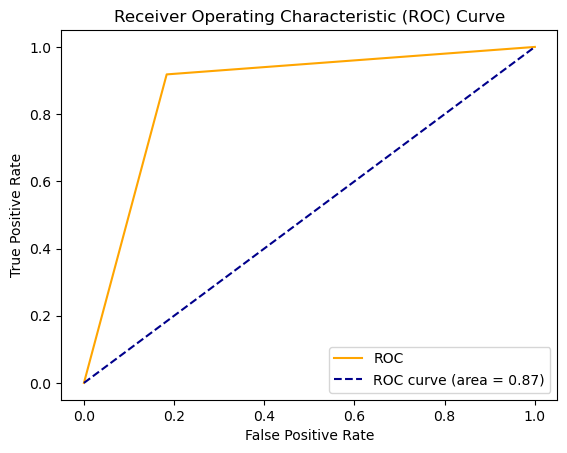

In [69]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [70]:
pickle.dump(logr,open("insurance_claim_logr_model.pickle","wb"))